# evaluate (projects)
evaluate `fasttext` and `tf-idf` vectorizations of projects.

### settings and setup

In [37]:
# Executed by system command line
!pip install -q fasttext
!pip install -q gensim
!pip install -q scikit-learn
!pip install -q adjustText

In [38]:
import os
import warnings

import fasttext
import gensim
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text # to adjust how text is labeled in scatter plots

warnings.filterwarnings('ignore')

print(pd.__version__)

0.25.1


In [3]:
DATASET = "./dataset"
TRAIN_TARGET = os.path.abspath(os.path.join(DATASET, 'train')) # add the .txt later.

MODEL = "./model"
MODEL_TARGET = os.path.abspath(os.path.join(MODEL, 'vectorization')) # add the .bin later.

PLOT = "./plots"

### vectorize
Vectorize the dataset using fasttext. The end product are "embeddings" for blocks / symbols.

### # Samples: 1000

### load model
Load the model from its saved target and also into gensim for evaluation below.

In [4]:
NUM_SAMPLES = 1000

In [5]:
model_target = MODEL_TARGET + "_" + str(NUM_SAMPLES) + ".bin"
print(model_target)

/home/jovyan/shared/lena/model/vectorization_1000.bin


In [6]:
model = fasttext.load_model(model_target)

In [7]:
gensim_model = gensim.models.fasttext.load_facebook_vectors(model_target)

In [38]:
train_target = TRAIN_TARGET + "_" + str(NUM_SAMPLES) + ".txt"
train_ids_target = TRAIN_TARGET + "_" + str(NUM_SAMPLES) + ".ids"
model_target = MODEL_TARGET + "_" + str(NUM_SAMPLES) + ".bin"

print(train_target)
print(train_ids_target)
print(model_target)

/home/jovyan/shared/lena/dataset/train_1000.txt
/home/jovyan/shared/lena/dataset/train_1000.ids
/home/jovyan/shared/lena/model/vectorization_1000.bin


-----

## evaluate

## project embeddings
Get project embeddings by using fasttext's sentence embeddings feature.

In [15]:
train_target = TRAIN_TARGET + "_" + str(NUM_SAMPLES) + ".txt"
train_ids_target = TRAIN_TARGET + "_" + str(NUM_SAMPLES) + ".ids"

In [16]:
# read in the projects text file into df
def to_df(filepath, columns=[]):
    df = pd.read_csv(filepath, sep="\n", header=None)
    df.columns = columns
    return df

projects_df = to_df(train_target, columns=['project_text'])
print(projects_df.shape)
display(projects_df.sample(n=5))

print("\n")

ids_df = to_df(train_ids_target, columns=['project_id'])
print(ids_df.shape)
display(ids_df.sample(n=5))

(1000, 1)


,project_text
542,_STARTSTACK_ event_whenbroadcastreceived _MENU...
217,_STARTSTACK_ event_whenflagclicked _NEXT_ look...
110,_STARTSTACK_ event_whenflagclicked _NEXT_ cont...
357,_STARTSTACK_ event_whenflagclicked _NEXT_ look...
534,_STARTSTACK_ event_whenflagclicked _NEXT_ cont...




(1000, 1)


,project_id
491,71592258
506,286559441
509,287022316
834,324672648
936,118549132


In [17]:
embeddings_df = projects_df.apply(lambda row: model.get_sentence_vector(row['project_text']), axis=1)
embeddings_df = pd.DataFrame(embeddings_df)
embeddings_df.columns = ['embedding']

display(embeddings_df)

print("embedding for first project: ")
display(embeddings_df.iloc[0]['embedding'])

,embedding
0,"[-0.040230893, -0.06662266, 0.045310386, -0.01..."
1,"[-0.056356616, -0.0574973, 0.010749617, 0.0008..."
2,"[-0.026022073, 0.019288387, 0.02910214, 0.0019..."
3,"[-0.058610912, -0.11983449, 0.03592223, -0.019..."
4,"[-0.017167674, -0.033115495, 0.0638788, -0.007..."
...,...
995,"[-0.03778393, -0.13203265, 0.061691195, -0.038..."
996,"[-0.02924269, -0.0034628015, 0.027490696, 0.00..."
997,"[-0.034308255, -0.03928398, 0.032689817, -0.00..."
998,"[-0.054626714, -0.109813735, 0.035949543, -0.0..."


embedding for first project: 


array([-0.04023089, -0.06662266,  0.04531039, -0.01401503, -0.11367609,
        0.01255058, -0.04699347,  0.10035603, -0.00277711, -0.02889598,
       -0.07274973, -0.06500007,  0.02163836, -0.04448214, -0.06371251,
        0.0551165 , -0.05482002, -0.09693345, -0.00639552, -0.05139799,
       -0.0157524 ,  0.07259618, -0.02047645, -0.03050701,  0.02569538,
        0.0361189 ,  0.07142551, -0.01318337,  0.01907382,  0.11788864,
        0.00446017, -0.02971984,  0.06327149, -0.0090721 , -0.00442131,
        0.00195606,  0.0047874 ,  0.00052323, -0.02305853, -0.01183716,
        0.16617277,  0.04268348,  0.04871353, -0.15220433,  0.05160927,
       -0.0150655 ,  0.00499895, -0.00651949, -0.0067385 ,  0.01849694,
       -0.04712213,  0.16251127,  0.00246108,  0.0158181 ,  0.01851191,
        0.0280358 , -0.0063501 , -0.0701537 ,  0.04069143,  0.00054887,
        0.0323212 ,  0.10702008,  0.00935832,  0.04920647,  0.03809311,
        0.07845454, -0.03520287,  0.01131017,  0.10516047,  0.07

In [33]:
display(embeddings_df['embedding'])
print(type(embeddings_df['embedding']))

0      [-0.040230893, -0.06662266, 0.045310386, -0.01...
1      [-0.056356616, -0.0574973, 0.010749617, 0.0008...
2      [-0.026022073, 0.019288387, 0.02910214, 0.0019...
3      [-0.058610912, -0.11983449, 0.03592223, -0.019...
4      [-0.017167674, -0.033115495, 0.0638788, -0.007...
                             ...                        
995    [-0.03778393, -0.13203265, 0.061691195, -0.038...
996    [-0.02924269, -0.0034628015, 0.027490696, 0.00...
997    [-0.034308255, -0.03928398, 0.032689817, -0.00...
998    [-0.054626714, -0.109813735, 0.035949543, -0.0...
999    [-0.056570627, -0.10956923, 0.025422804, -0.01...
Name: embedding, Length: 1000, dtype: object

<class 'pandas.core.series.Series'>


In [34]:
# manually convert embeddings_df into a dataframe of shape (1000, 128)
embeddings_list = []
embeddings_df.apply(lambda row: embeddings_list.append(row['embedding'].tolist()), axis=1)

expanded_df = pd.DataFrame(embeddings_list)
display(expanded_df)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.040231,-0.066623,0.045310,-0.014015,-0.113676,0.012551,-0.046993,0.100356,-0.002777,-0.028896,...,-0.018016,0.028384,-0.011713,0.002794,-0.028215,0.027660,-0.110929,0.126999,-0.137627,-0.043774
1,-0.056357,-0.057497,0.010750,0.000848,-0.096064,0.015773,-0.051376,0.077702,-0.007328,0.002833,...,0.007820,0.039310,0.003097,0.007312,-0.016286,0.027808,-0.138182,0.141961,-0.119572,-0.052496
2,-0.026022,0.019288,0.029102,0.001920,-0.138819,0.011191,-0.104626,0.123421,0.012402,-0.028490,...,-0.036431,0.034920,-0.009037,0.040591,-0.022962,0.044168,-0.139892,0.141936,-0.122646,-0.056805
3,-0.058611,-0.119834,0.035922,-0.019265,-0.100824,0.005740,-0.047415,0.071157,0.001470,0.018265,...,0.021938,0.051567,0.011984,-0.038455,-0.007224,0.001667,-0.113365,0.128683,-0.091785,-0.024312
4,-0.017168,-0.033115,0.063879,-0.007755,-0.129087,0.013488,-0.063418,0.116989,0.009928,-0.054836,...,-0.043673,0.017219,-0.031002,0.021375,-0.025836,0.038126,-0.117357,0.128393,-0.159099,-0.037548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.037784,-0.132033,0.061691,-0.038546,-0.083787,-0.004653,-0.034699,0.059271,0.003365,0.017561,...,0.010433,0.058487,0.034410,-0.065622,-0.016162,-0.006543,-0.094150,0.130567,-0.076699,-0.018568
996,-0.029243,-0.003463,0.027491,0.004048,-0.112206,0.012309,-0.088927,0.096598,0.001103,0.002444,...,-0.022610,0.049811,0.022150,0.007009,-0.017226,0.035373,-0.126637,0.136628,-0.087084,-0.056059
997,-0.034308,-0.039284,0.032690,-0.001979,-0.100599,0.004569,-0.085108,0.088650,-0.001110,0.015768,...,-0.011111,0.059132,0.031121,-0.009442,-0.009151,0.025982,-0.123440,0.140851,-0.082679,-0.049526
998,-0.054627,-0.109814,0.035950,-0.010695,-0.086199,-0.000338,-0.039626,0.073573,0.000432,-0.003083,...,0.012459,0.038695,-0.006344,-0.008941,-0.010698,0.016124,-0.116833,0.130801,-0.137078,-0.036546


### principal component analysis (t-sne)

In [44]:
def visualize_clustering(embeddings, ids, img_path, label=True, ndims=128, random_seed=22):    
    # fit tsne on this dataset – 2 components
    tsne = TSNE(n_components=2, random_state=random_seed)
    tsne_fitted = tsne.fit_transform(embeddings)
    
    # plot these embeddings on these new dimensions to visualize
    x_coords = tsne_fitted[:, 0] # first component
    y_coords = tsne_fitted[:, 1] # second component
    
   
    plt.figure(figsize=(30, 30))
    plt.scatter(x_coords, y_coords)
    
    if label:
        texts = []
        for project_id, x, y in zip(ids, x_coords, y_coords):
    #         plt.annotate(project_id, xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center')
            texts.append(plt.text(x, y, project_id, ha='center', va='center')) 
    #     plt.xlim(x_coords.min()+5, x_coords.max()+5)
    #     plt.ylim(y_coords.min()+5, y_coords.max()+5) 
        adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
        
    plt.savefig(img_path, format='png')
    plt.show()
    
    return embeddings

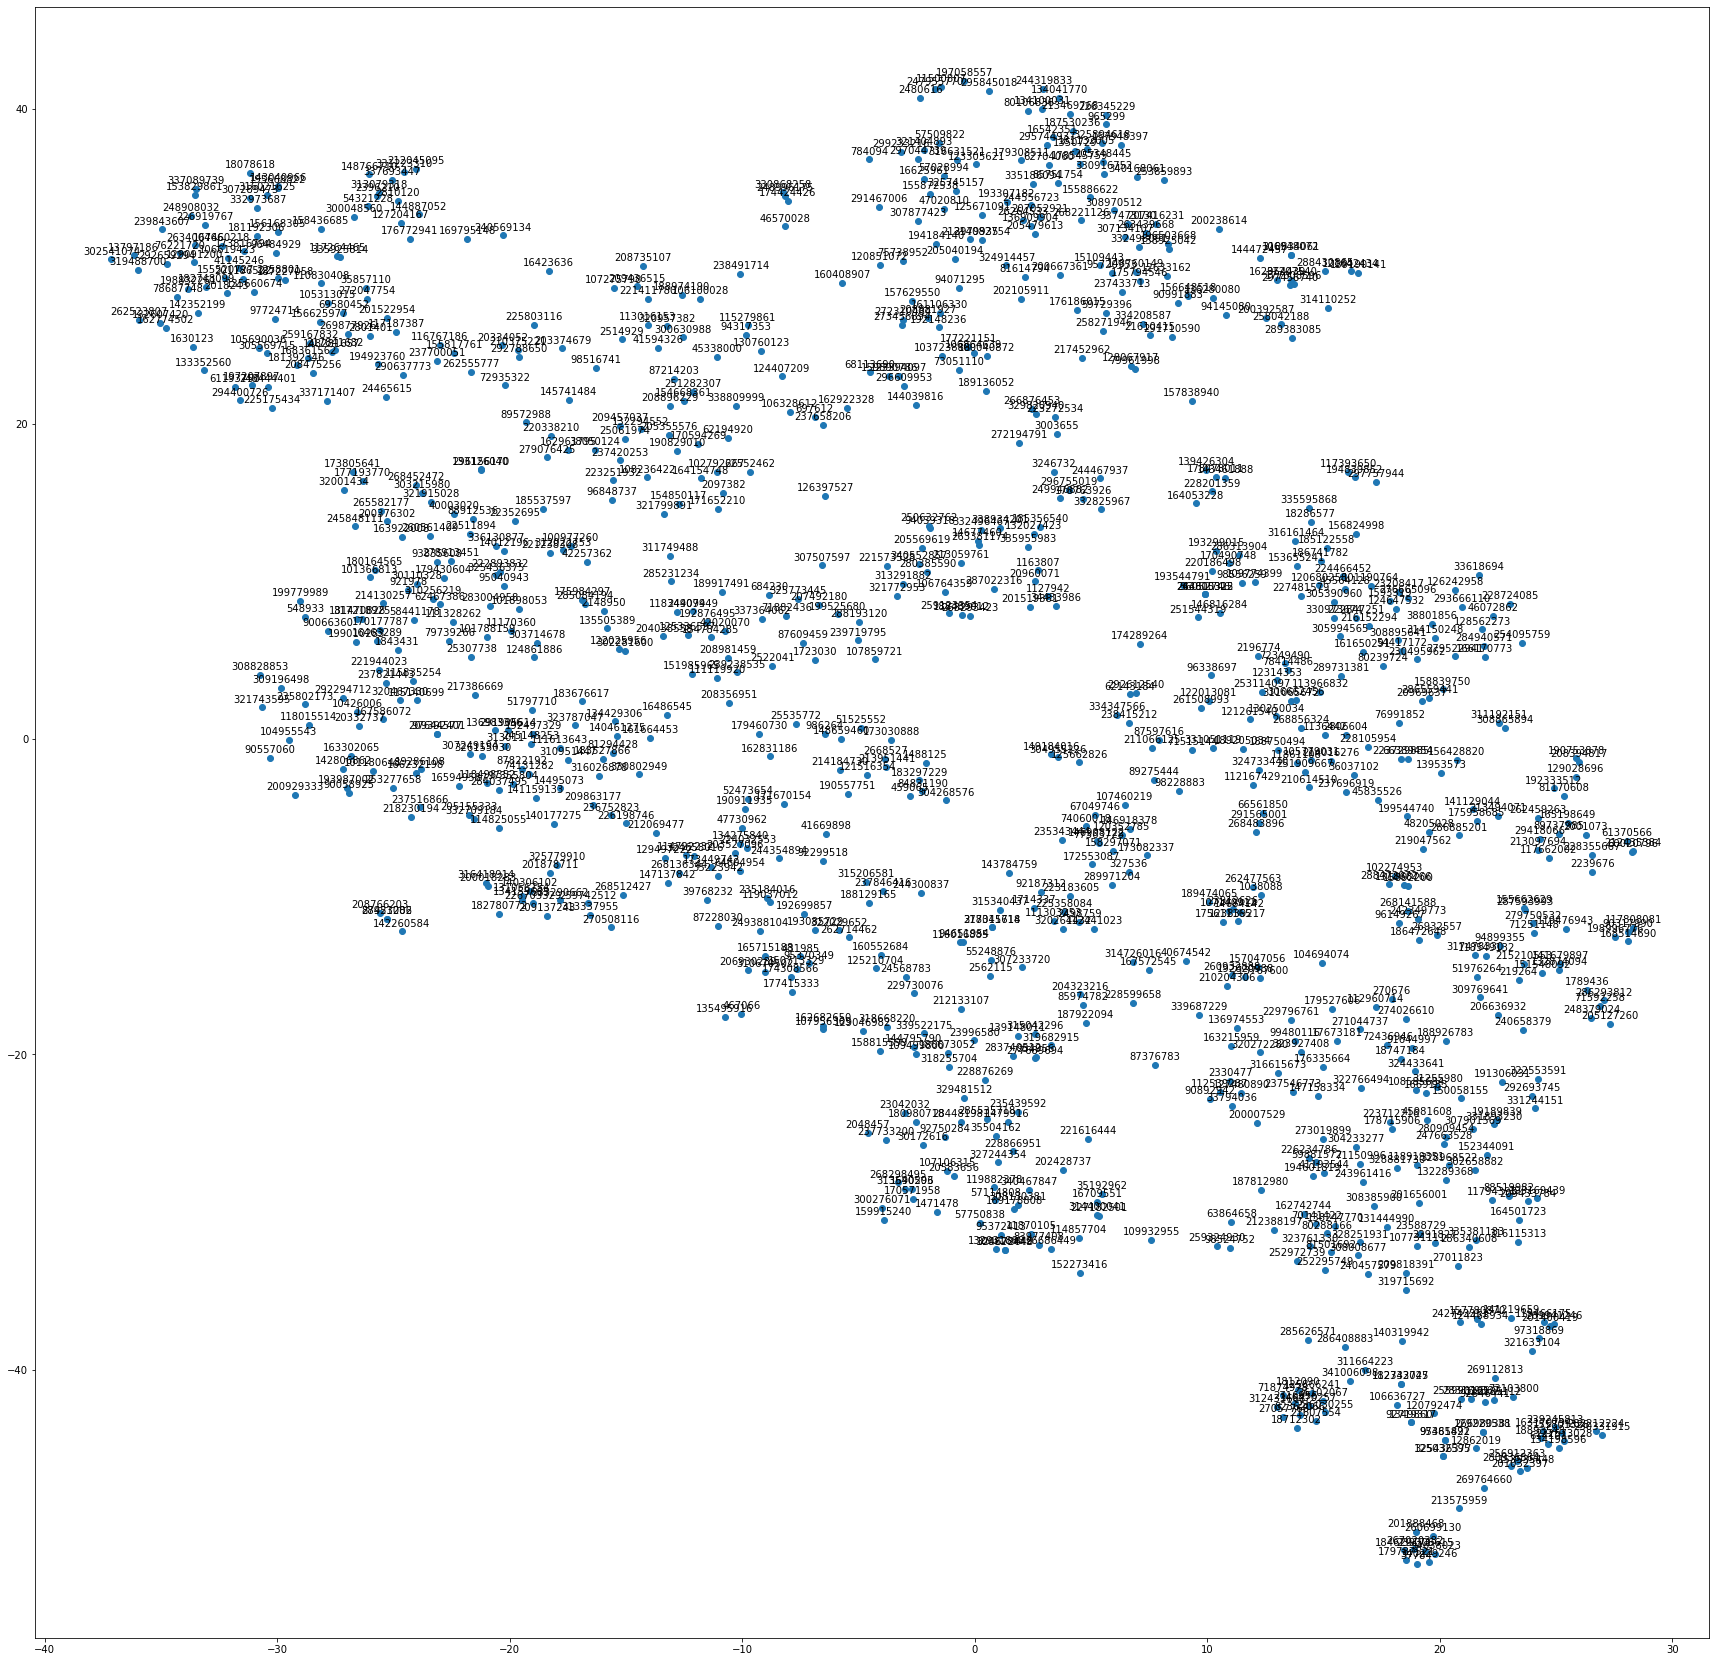

In [41]:
# old run; code modified after
ids = ids_df['project_id'].tolist()
img_path = os.path.abspath(os.path.join(PLOT, 'tsne_all_projects.png'))
embeddings = visualize_clustering(expanded_df, ids, img_path, ndims=128)

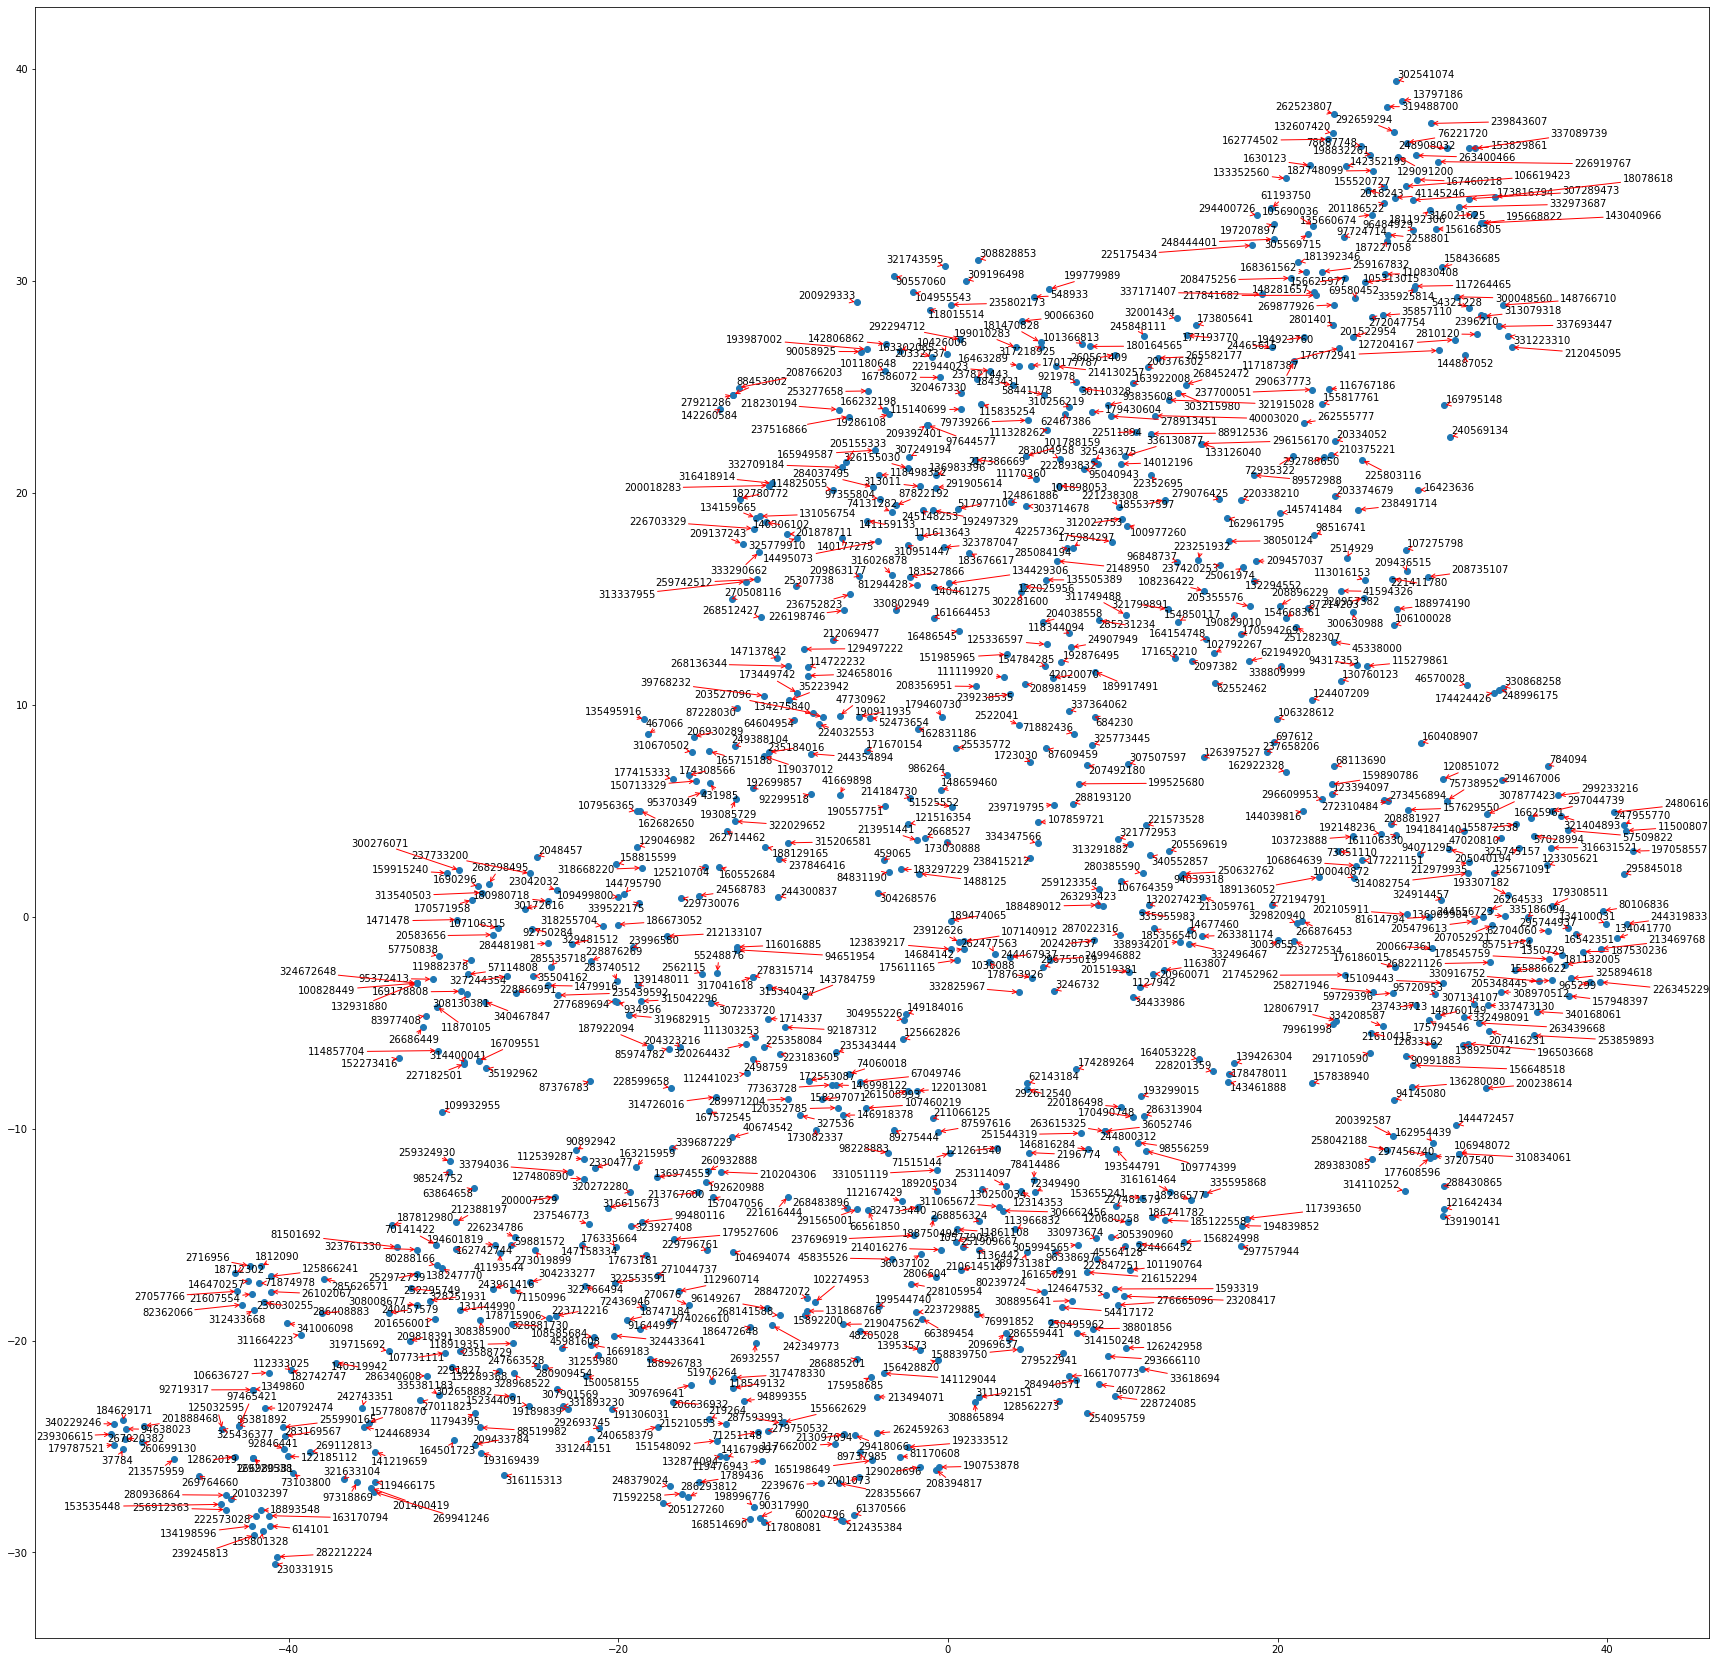

In [43]:
ids = ids_df['project_id'].tolist()
img_path = os.path.abspath(os.path.join(PLOT, 'tsne_all_projects2.png'))
embeddings = visualize_clustering(expanded_df, ids, img_path, ndims=128, random_seed=22)

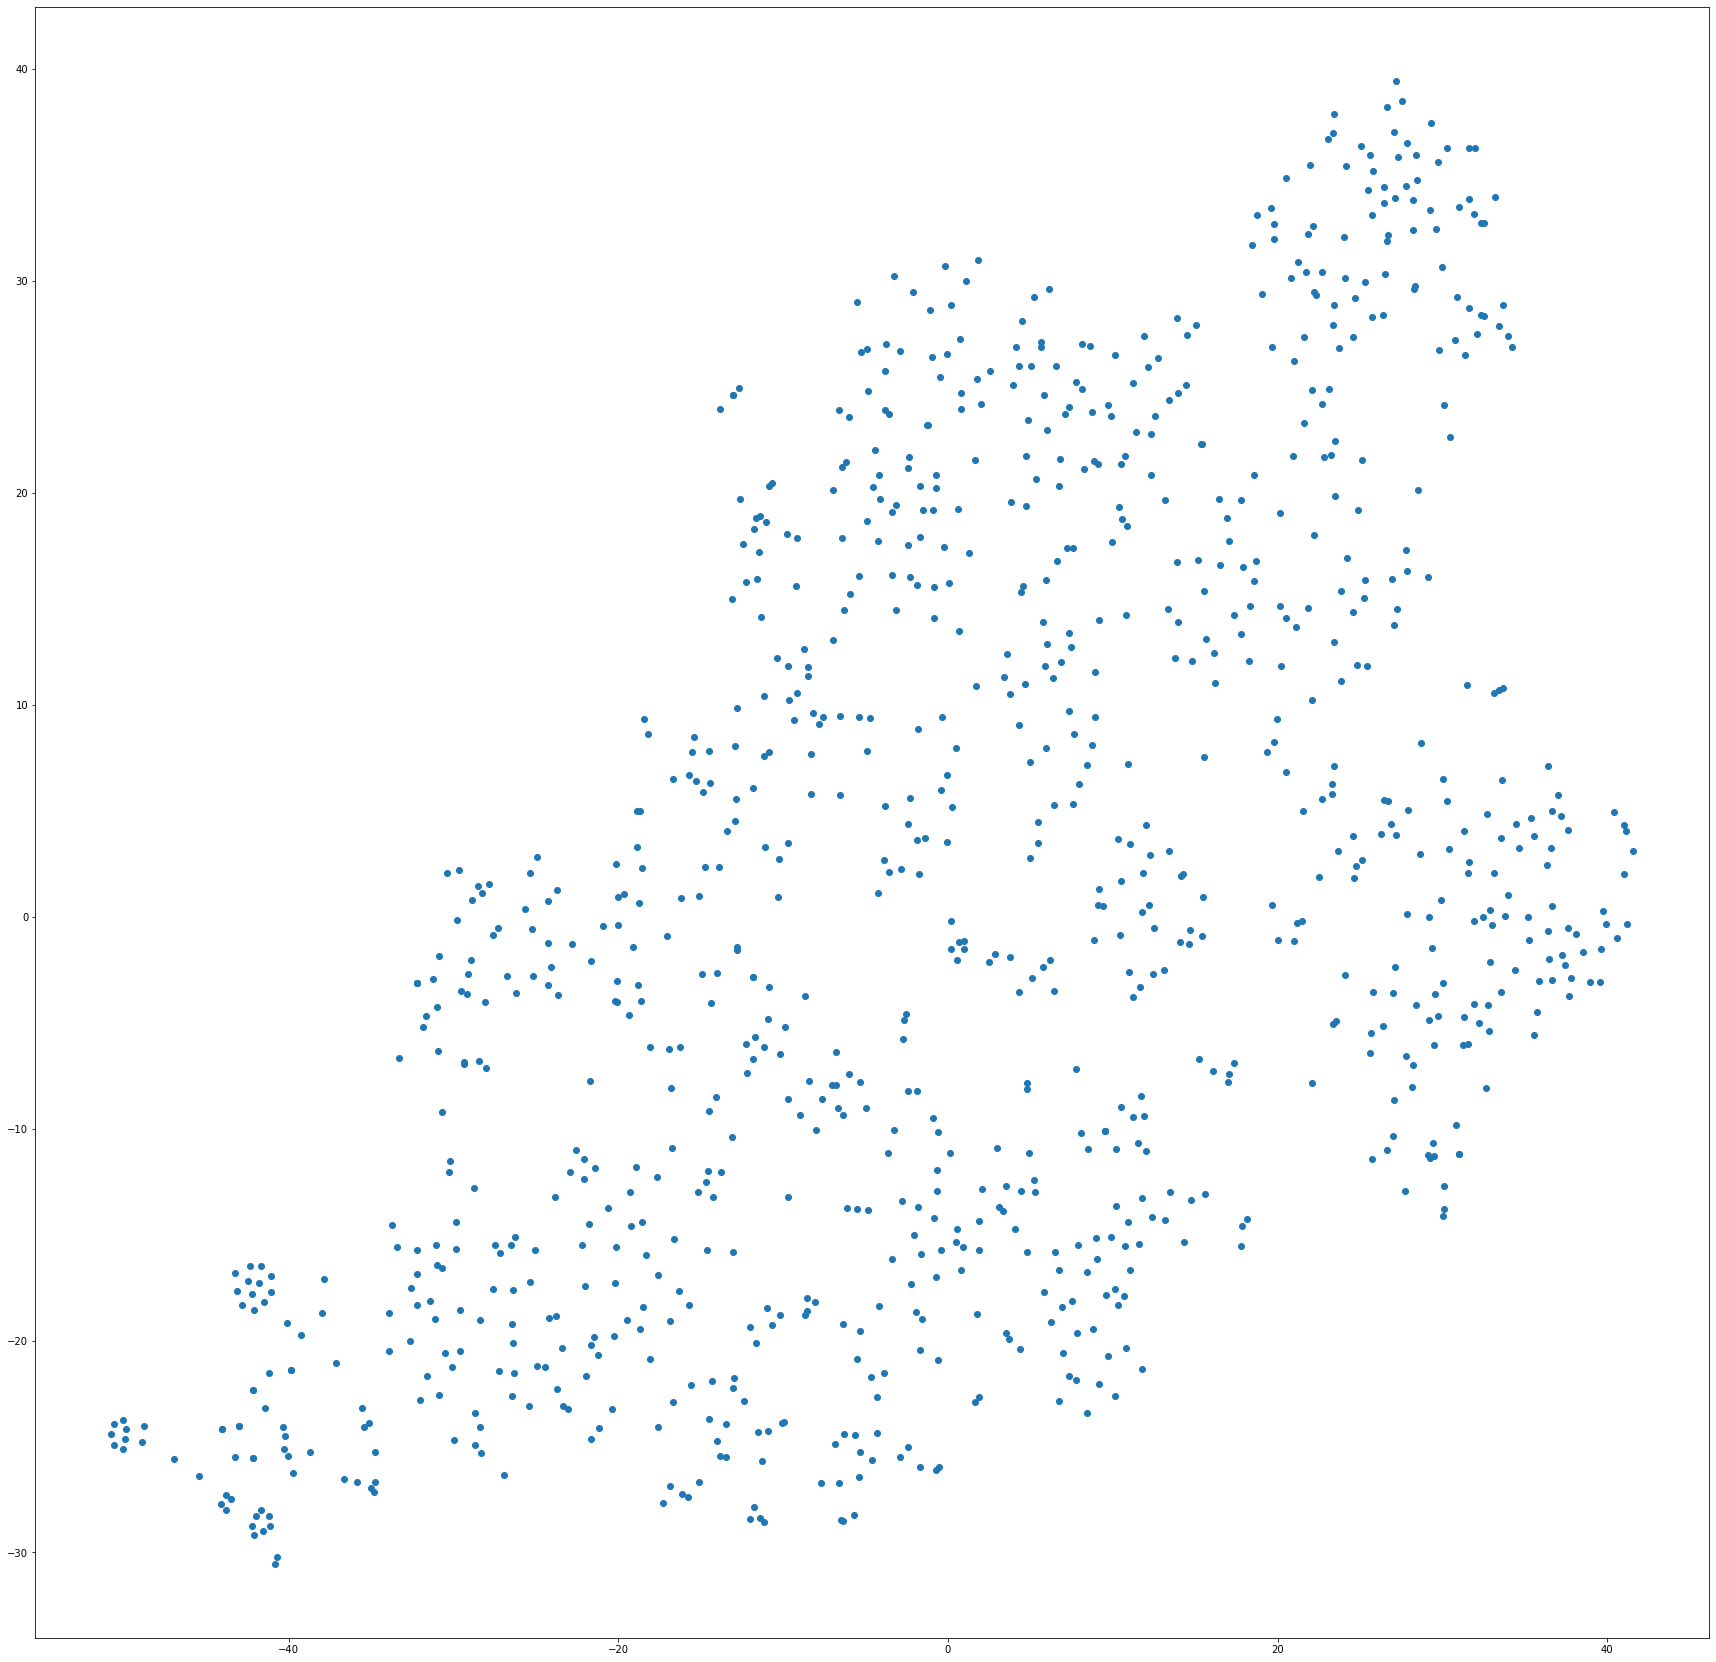

In [45]:
ids = ids_df['project_id'].tolist()
img_path = os.path.abspath(os.path.join(PLOT, 'tsne_all_projects2_no_labels.png'))
embeddings = visualize_clustering(expanded_df, ids, img_path, label=False, ndims=128, random_seed=22)

In [ ]:
# try running without any random seed. Does it change as often (when no labels)?
ids = ids_df['project_id'].tolist()
# img_path = os.path.abspath(os.path.join(PLOT, 'tsne_all_projects2_no_labels.png'))
embeddings = visualize_clustering(expanded_df, ids, img_path, label=False, ndims=128, random_seed=22)

### nearest neighbors

In [107]:
nearest_neighbors = NearestNeighbors(metric="cosine")
nearest_neighbors.fit(expanded_df)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [109]:
k = 5
index = np.random.randint(0, expanded_df.shape[0])
print("index: ", index)

index:  283


In [110]:
# choose that project and find its nearest k neighbors
starting_vector = np.array([expanded_df.iloc[index]])
print(starting_vector)

[[ 6.97615072e-02  6.57400265e-02 -3.34371254e-02  4.18769903e-02
   5.69175519e-02 -1.12064146e-01  2.94414908e-02 -4.85875867e-02
  -1.32593466e-02  5.42802624e-02  2.03577615e-02  6.69644773e-02
  -1.62587568e-01  4.66616265e-02  9.14045572e-02  2.49258876e-02
  -7.60512948e-02 -3.17236483e-02 -1.30967353e-04  6.62060548e-03
  -7.35823158e-03  7.13337883e-02  6.32410720e-02 -8.49552155e-02
  -8.19851551e-03  1.21636629e-01  1.46083152e-02  2.68485770e-02
   2.91193370e-02  1.68001354e-02  8.71664360e-02 -9.63721052e-03
  -1.07785892e-02 -6.32466450e-02 -2.26000231e-02  1.64357517e-02
  -6.38507903e-02 -6.14448749e-02  1.25446972e-02 -4.94829789e-02
   6.22446202e-02  1.66502576e-02  6.25355989e-02  2.07998045e-03
   3.13462168e-02  1.16934292e-02  2.64623184e-02  4.27640192e-02
   9.22974083e-04 -1.65578595e-03 -4.43574414e-02  1.58222869e-01
  -5.43447770e-02  2.77610719e-02  1.02573752e-01  5.99563904e-02
   4.33021272e-03 -5.66228032e-02  8.59366357e-02 -5.16924374e-02
  -2.36605

## sanity check

In [115]:
ids_df.iloc[283]['project_id']

42020070

In [114]:
projects_df.iloc[283]['project_text']

'_STARTSTACK_ event_whenflagclicked _NEXT_ looks_switchbackdropto _MENU_ menu_option _MENU_ _NEXT_ data_setvariableto _MENU_ _VAR_ _MENU_ _STARTINPUT_ numtext_input _ENDINPUT_ _NEXT_ data_setvariableto _MENU_ _VAR_ _MENU_ _STARTINPUT_ numtext_input _ENDINPUT_ _NEXT_ control_forever _STARTNEST_ control_if _STARTINPUT_ operator_equals _STARTINPUT_ _VAR_ _ENDINPUT_ _STARTINPUT_ numtext_input _ENDINPUT_ _ENDINPUT_ _STARTNEST_ looks_switchbackdroptoandwait _MENU_ menu_option _MENU_ _NEXT_ control_stop _MENU_ menu_option _MENU_ _ENDNEST_ _ENDNEST_ _ENDSTACK_ _STARTSTACK_ event_whenbroadcastreceived _MENU_ menu_option _MENU_ _NEXT_ looks_switchbackdropto _MENU_ menu_option _MENU_ _ENDSTACK_ _STARTSTACK_ event_whenflagclicked _NEXT_ looks_setsizeto _STARTINPUT_ numtext_input _ENDINPUT_ _NEXT_ looks_hide _NEXT_ control_forever _STARTNEST_ motion_gotoxy _STARTINPUT_ operator_random _STARTINPUT_ numtext_input _ENDINPUT_ _STARTINPUT_ numtext_input _ENDINPUT_ _ENDINPUT_ _STARTINPUT_ operator_random

In [113]:
# sanity check
model.get_sentence_vector(projects_df.iloc[283]['project_text'])

array([ 6.97615072e-02,  6.57400265e-02, -3.34371254e-02,  4.18769903e-02,
        5.69175519e-02, -1.12064146e-01,  2.94414908e-02, -4.85875867e-02,
       -1.32593466e-02,  5.42802624e-02,  2.03577615e-02,  6.69644773e-02,
       -1.62587568e-01,  4.66616265e-02,  9.14045572e-02,  2.49258876e-02,
       -7.60512948e-02, -3.17236483e-02, -1.30967353e-04,  6.62060548e-03,
       -7.35823158e-03,  7.13337883e-02,  6.32410720e-02, -8.49552155e-02,
       -8.19851551e-03,  1.21636629e-01,  1.46083152e-02,  2.68485770e-02,
        2.91193370e-02,  1.68001354e-02,  8.71664360e-02, -9.63721052e-03,
       -1.07785892e-02, -6.32466450e-02, -2.26000231e-02,  1.64357517e-02,
       -6.38507903e-02, -6.14448749e-02,  1.25446972e-02, -4.94829789e-02,
        6.22446202e-02,  1.66502576e-02,  6.25355989e-02,  2.07998045e-03,
        3.13462168e-02,  1.16934292e-02,  2.64623184e-02,  4.27640192e-02,
        9.22974083e-04, -1.65578595e-03, -4.43574414e-02,  1.58222869e-01,
       -5.43447770e-02,  

In [111]:
nearest_distances, nearest_vector_indices = nearest_neighbors.kneighbors(starting_vector, k)
print("nearest neighbors: ", list(zip(nearest_vector_indices.flatten().tolist(), nearest_distances.flatten().tolist())))


nearest neighbors:  [(283, 0.0), (763, 0.0013612652877338371), (150, 0.0017799424258045926), (198, 0.0018551831317965561), (693, 0.0021757982847219193)]
